## CS/ECE/ISyE 524 — Introduction to Optimization — Spring 2017

# Chess Replacement

Junchao Chen (jchen395@wisc.edu), Weiyun Hua (whua3@wisc.edu), and Qiwen Shu (qshu@wisc.edu)


## Table of Contents

<a href='#intro'>1.Introduction</a ><br />
<a href='#Mathematical'>2.Mathematical model</a ><br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href='#single'>A. Singular Chess Placement</a ><br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href='#mixed'>B. Mixed Chess Placement</a ><br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href='#checkmate'>C.Real Practice : Checkmate!</a >

<a href='#Solution'>3.Solution</a ><br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href='#Singular'>A. Singular Chess Placement</a ><br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href='#knight'>1.Knights</a ><br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href='#pawn'>2.Pawns</a ><br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href='#king'>3.Kings</a ><br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href='#dominant'>B. Mixed Chess Placement: Dominance</a ><br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href='#check'>C. Chess Placement: Checkmate</a >

<a href='#discussion'>4. Results and Discussion</a ><br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href='#analysis1'>A. Singular placement results and tradeoff analysis</a ><br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href='#analysis2'>B. Mixed placement results</a ><br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href='#analysis3'>C. Chess Placement: Checkmate and tradeoff analysis</a ><br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href='#analysis4'>D. Model Limitation and Further Improvements</a ><br />

<a href='#conclusion'>5. Conclusion</a >



<a id='intro'></a >
# 1. Introduction

The report was intended to explore some optimization options based on the game of chess. The Chess, originated in India sometime before the 7th century, is a popular two-player strategy game with a checkered gameboard with 64 squares arranged in an 8×8 grid. It has been around the world over centuries and played by millions of people worldwide. 

There are 16 pieces of chess for each side: 1 king, 1 queen, 2rooks, 2 knights, 2 bishops, and 8 pawns. The goal of the game is to checkmate the opponent's king by placing it under an inescapable threat of capture. 

Each member of the chess has its unique pattern of moving (capturing). These pieces assumed their current powers in Spain in the late 15th century and the rules are finalized in the 19th century. We define the moving pattern of pawns as moving diagonally by one square for each step. The moving patterns of other kinds of chesses are decribed as below: 

![alt text](https://juliabox.com/files/Pattern.PNG) 
[citation](https://en.wikipedia.org/wiki/Chess)


As we can see from the abovechart, queen has the most powerful moving pattern, covering the widest ranges on the board while the pawn has the least powerful moving pattern. Bishop, rook, and knight are relatively dominant to each other under different circumstances. 





Under these abovementioned unique rule for each chess, a certain series of recreational mathematics problems have been developed. Two typical problem set, Independence problems and domination problems with the queen were given in the homework problem set. Based on the question, we are determined to explore more optimization problems under other circumstances.  

<a id='Mathematical'></a >
# 2.Mathematical model

### General Problem Setting: 

We are given certain settings and limitations to determine : 

1.Independence problem: Maximum number of chess to place on the board without threatening each other

2.Domination problem: Minimum number of chess to place on the board that threatening all the squares. 


<a id='single'></a >
### 2.A. Singular Chess Placement: 

Solve the independence problem and domination problem for King, Knights and Pawns where only one kind of chess are allowed to be used. We decide not to do queen, bishop and rook since the queen's solution has been covered in the homework solution. In addition, queen can be viewed as a combination of bishop and rook, therefore, they will not be covered either.   

#### Part 1 General Setup
To start with, we will have a function called *printBoard* that serves as a helper function to print a chess board. The *input* for the helper function will be the variable that contains the information on the placement of the chess and a parameter for the dimension of the chess board. 

We will be modeling this problem based on the example of sudoku problem where we will create a 8*8 binary matrix variable (x[1:8, 1:8]) to take account all 64 squares of the board. We would be making constraints to keep track of the replacement of chess on the board to ensure the corresponding requirements are satisfied. Loops are widely used in constructing constraints. 

#### Part 2 Independence

For Indepence problem, constraints are constructed to ensure each chess member will not threaten each other. Under that case, we have to ensure that the sum of the possible movement on each square <= 1, indicating that each square can only be reached by at most one chess. We will then have an objective that aims to maximize the total number of chess that we can put on the board. The following represents the optimization problem in standard form: 


Let $S_i,_j$ be the set of placements that are reachable from the placement of chess x[i,j]
 
###### Decision Variables:

Define binary matrix variable x[i,j] to indicate whether chess board is empty or occupied.

###### Constraints:

Each placement of chess x[i,j] and one of its reachable places x[a,b] have conflicts. At most one of them can be occupied. That is x[i, j] + x[a, b] <=1.

###### Objective:
Maximize the total number of occupied placement.

###### Model:

This is an **ILP** model.

Maximize: $$ \sum_{i=1}^{n}\sum_{j=1}^{n}x[i,j]$$
Subject to: 
$$ x[ i, j ]\in {0,1}, \forall i \in {1,2,...,n}, \forall j \in {1,2,...,n} $$

$$ x[ i, j ]+x[ a , b ] \le 1, \forall x[ a , b ] \in S_i,_j, \forall i \in {1,2,...,n}, \forall j \in {1,2,...,n} $$ 


#### Part 3 Dominance                  

For Dominance problem, constraints are constructed to ensure each square on the board is threatened by at least one chess. Under that case, we have to ensure that the sum of the possible movement on each square >= 1, indicating that each square on the board has to be reached by at least one chess. We will then have an objective that aims to minimize the total number of chess that we can put on the board. The following represents the optimization problem in standard form:    
   
Let $S_i,_j$ be the set of placements that are reachable to the placement of chess x[i,j]
 
###### Decision Variables:

Define binary matrix variable x[i,j] to indicate whether chess board is empty or occupied.

###### Constraints:

Each square on the board has to be reached by at least one chess. That is $ \sum_{}x[ a, b ] \ge 1, \forall x[ a , b ] \in S_i,_j$

###### Objective:

Minimize the total number of occupied placement.

###### Model:

This is an **ILP** model.

Minimize: $$\sum_{i=1}^{n}\sum_{j=1}^{n}x[i,j]$$

Subject to: $$ x[ i, j ] \in {0,1}, \forall i \in {1,2,...,n}, \forall j \in {1,2,...,n} $$
        $$ \sum_{}x[ a, b ] \ge 1, \forall x[ a , b ] \in S_i,_j, \forall i \in {1,2,...,n}, \forall j \in {1,2,...,n} $$




<a id='mixed'></a >
### 2.B. Mixed Chess Placement: 

In this part, we are using a mixed type chess strategy to solve the domination problem. In order to evaluate each placement, we need to assign a score to each chess member. The score is used to represent how “powerful” a chess’s threatening power is. It can be determined based on the previous result, we decide to take the reciprocity as its value. Since the threatening pattern of queen can be regarded as a combination of bishop and rook, we will only consider queen for the mixed strategy. In addition, the moving pattern of the pawn can be viewed as a sub moving pattern of the king, therefore pawn will also be eliminated from the mixed placement strategy. Therefore, the values of the selected chesses are displayed as the following: 

King: 1/3

Queen : 3/5

Knight: 1/4

With the scores that we have assigned, we are trying to determine the optimized way of placement for independence problem and domination problem. 
####   Part 1 General Setup

To start with, we still use the function *printBoard* that serves as a helper function to print a chess board. However, the *input* for the helper function will be three variable that contains the information on the placement of each chess on the board and a parameter for the dimension of the chess board. In addition, an array of threatening power value will be created prior to modeling.  

We will follow the previous model where we will create a 8*8 binary matrix variable (x[1:8, 1:8], y[1:8, 1:8],z[1:8, 1:8]) to take account all 64 squares of the board corresponding to king, queen, and knight's placement. We would be making constraints to keep track of the status of each square to ensure the corresponding requirements are satisfied. Loops are widely used in constructing constraints. 

#### Part 2 Mixed Dominance                  

For Dominance problem, constraints are constructed to ensure each square on the board is threatened by at least one chess. Under that case, we have to ensure that the sum of all possible movement from all three selected chess members on each square >= 1, indicating that each square on the board has to be reached by at least one chess. As for the objective, we will try to minimize the sumproduct of the chess number along with its associated values to achieve the minimum score. The following represents the optimization problem in standard form:    

Let $S_i,_j$ be the set of placements that are reachable to the placement of x[i,j], where x[i,j] = king[i,j] + queen[i,j] + knight[i,j].

Let $P_n$ be the set of chess score, where n = different kinds of chesses. n=1:king; n=2:queen; n=3:knight.

###### Decision Variables:

Define binary matrix variable king[i,j] to indicate whether chess board is empty or occupied for king.

Define binary matrix variable queen[i,j] to indicate whether chess board is empty or occupied for queen.

Define binary matrix variable knight[i,j] to indicate whether chess board is empty or occupied for knight.

###### Constraints:

The placement of king, queen, and knight cannot overlap. That is $ king[ i, j ]+queen[ i, j ]+knight[ i, j ] \le 1$

Each square on the board has to be reached by at least one chess. That is $ \sum_{}x[ a, b ] \ge 1, \forall x[ a , b ] \in S_i,_j$

###### Objective:

Minimize the total score that needed to threat all squares on the board.

###### Model:

This is an **ILP** model.

Minimize: $$\sum_{i=1}^{n}\sum_{j=1}^{n}king[i,j]*P_1+queen[i,j]*P_2+knight[i,j]*P_3$$

Subject to: $$ king[ i, j ] \in{0,1}$$

$$ queen[ i, j ] \in {0,1}$$

$$ knight[ i, j ] \in {0,1}$$

$$ x[ i, j ] \le 1$$

$$ \sum_{}x[ a, b ] \ge 1, \forall x[ a , b ] \in S_i,_j$$
$$ \forall i \in {1,2,...,n}, \forall j \in {1,2,...,n}$$


<a id='checkmate'></a >
### 2.C.Real Practice : Checkmate! 

Now we are trying to model the problem based on the real chess setup. Checkmate is always the most exciting part in the chess game, if we can make sure the whole board is threatened by our "force", we are guaranteed to checkmate our opponment. Therefore, we are trying to determine the most effective way of dominating the whole board under a whole "kingdom" force. The following represents the optimization problem in standard form:    

Let $S_i,_j$ be the set of placements that are reachable to the placement of x[i,j], where x[i,j] = king[i,j] + queen[i,j] + knight[i,j] + bishop[i,j] + rook[i,j] + pawn[i,j]

Let $P_n$ be the set of chess score, where n = different kinds of chesses. n=1:king; n=2:queen; n=3:knight; n=4:bishop; n=5:rook; n=6:pawn.

###### Decision Variables:

Define binary matrix variable king[i,j] to indicate whether chess board is empty or occupied for king.

Define binary matrix variable queen[i,j] to indicate whether chess board is empty or occupied for queen.

Define binary matrix variable knight[i,j] to indicate whether chess board is empty or occupied for knight.

Define binary matrix variable bishop[i,j] to indicate whether chess board is empty or occupied for bishop.

Define binary matrix variable rook[i,j] to indicate whether chess board is empty or occupied for rook.

Define binary matrix variable pawn[i,j] to indicate whether chess board is empty or occupied for pawn.

###### Constraints:             

The placement of king, queen, knight, bishop, rook, and pawn cannot overlap. That is $ x[ i, j ] \le 1$

Each square on the board has to be reached by at least one chess. That is $ \sum_{}x[ a, b ] \ge 1, \forall x[ a , b ] \in S_i,_j$

The number of each kind of chesses cannot exceed its assigned limit.

###### Objective:

Minimize the sumproduct of score and all six kinds of chess.

###### Model:

This is an **ILP** model.

Minimize: $$\sum_{i=1}^{n}\sum_{j=1}^{n}(king[i,j]*p_1+queen[i,j]*p_2+knight[i,j]*p_3+bishop[i,j]*p_4+rook[i,j]*p_5+pawn[i,j]*p_6)$$

Subject to: $$ king[ i, j ] \in{0,1}$$

$$ queen[ i, j ] \in {0,1}$$

$$ knight[ i, j ] \in {0,1}$$

$$ bishop[ i, j ] \in {0,1}$$

$$ rook[ i, j ] \in {0,1}$$

$$ pawn[ i, j ] \in {0,1}$$

$$ x[ i, j ] \le 1$$

$$ \sum_{}x[ a, b ] \ge 1, \forall x[ a , b ] \in S_i,_j, \forall i \in {1,2,...,n}, \forall j \in {1,2,...,n}$$

$$\sum_{i=1}^{n}\sum_{j=1}^{n}king[ i, j ] \le 1$$

$$\sum_{i=1}^{n}\sum_{j=1}^{n}queen[ i, j ] \le 1$$

$$\sum_{i=1}^{n}\sum_{j=1}^{n}knight[ i, j ] \le 2$$

$$\sum_{i=1}^{n}\sum_{j=1}^{n}bishop[ i, j ] \le 2$$

$$\sum_{i=1}^{n}\sum_{j=1}^{n}rook[ i, j ] \le 2$$

$$\sum_{i=1}^{n}\sum_{j=1}^{n}pawn[ i, j ] \le 8$$

<a id='Solution'></a >
# 3.Solution

### Helper Function

In [36]:
# helper function to print a chess board
function printBoard(X,Y,Z,A,B,C,n)
    print("+")
    for i in 1:n
        print("---+")
    end
    print("\n")
    
    for i in 1:n
        print("| ")
        for j in 1:n
            if (X[i,j] == 1)
                print("K")
                print(" | ")
            elseif (Y[i,j] == 1)
                print("Q")
                print(" | ")
            elseif (Z[i,j] == 1)
                print("N")
                print(" | ")
            elseif (A[i,j] == 1)
                print("P")
                print(" | ")
            elseif (B[i,j] == 1)
                print("B")
                print(" | ")
            elseif (C[i,j] == 1)
                print("R")
                print(" | ")
            else
                print(" ")
                print(" | ")
            end
        end
        print("\n")
        print("+")
        for j in 1:n
            print("---+")
        end
        print("\n")
    end
end

printBoard (generic function with 3 methods)

<a id='Singular'></a >
### 3A. Singular Chess Placement:

<a id='knight'></a >
##### Knight


Independence: Place as many knights as possible on the board so that no two knights threaten each other.

In [37]:
using JuMP, Cbc

function knightIndependence(n)

m1 = Model(solver=CbcSolver())
@variable(m1, x[1:n,1:n], Bin)
for i in 1:n
    for j in 1:n
        if (i-2 > 0)
            if (j+1 < n+1)
                @constraint(m1, x[i,j] + x[i-2,j+1] <= 1)
            end
            if (j-1 > 0)
                 @constraint(m1, x[i,j] + x[i-2,j-1] <= 1)
            end
        end  
        if (i-1 > 0)
            if(j+2 < n+1)
                 @constraint(m1, x[i,j] + x[i-1,j+2] <= 1)
            end
            if(j-2 > 0)
                 @constraint(m1, x[i,j] + x[i-1,j-2] <= 1)
            end
        end
        if (i+1 < n+1)
            if(j-2 > 0)
                 @constraint(m1, x[i,j] + x[i+1,j-2] <= 1)
            end
            if(j+2 < n+1)
                 @constraint(m1, x[i,j] + x[i+1,j+2] <= 1)
            end
        end
        if (i+2 < n+1)
            if (j+1 < n+1)
                @constraint(m1, x[i,j] + x[i+2,j+1] <= 1)
            end
            if (j-1 > 0)
                @constraint(m1, x[i,j] + x[i+2,j-1] <= 1)
            end
        end
    end
end
@objective(m1, Max, sum(x))
status = solve(m1)
return getvalue(x), getobjectivevalue(m1)
end
;

Dominance: Place as few knights as possible on the board to cover the whole board.

In [38]:
using JuMP, Cbc
function knightDomination(n)

m2 = Model(solver=CbcSolver())
@variable(m2, x[1:n,1:n], Bin)
s = x*0
for i in 1:n
    for j in 1:n
        s[i,j] = s[i,j] + x[i,j]
        if (i-2 > 0)
            if (j+1 < n+1)
                s[i,j] = s[i,j] + x[i-2,j+1]
            end
            if (j-1 > 0)
                 s[i,j] = s[i,j] + x[i-2,j-1]
            end
        end  
        if (i-1 > 0)
            if(j+2 < n+1)
                 s[i,j] = s[i,j] + x[i-1,j+2]
            end
            if(j-2 > 0)
                 s[i,j] = s[i,j] + x[i-1,j-2]
            end
        end
         if (i+1 < n+1)
            if(j-2 > 0)
                 s[i,j] = s[i,j] + x[i+1,j-2]
            end
            if(j+2 < n+1)
                 s[i,j] = s[i,j] + x[i+1,j+2]
            end
        end
        if (i+2 < n+1)
            if (j+1 < n+1)
                s[i,j] = s[i,j] + x[i+2,j+1]
            end
            if (j-1 > 0)
                s[i,j] = s[i,j] + x[i+2,j-1]
            end
        end
        @constraint(m2, s[i,j]>=1)
    end
end
@objective(m2, Min, sum(x))
status = solve(m2)
return getvalue(x), getobjectivevalue(m2)
end
;

<a id='pawn'></a >
##### Pawn

Independence: Place as many Pawns as possible on the board so that no two Pawns threaten each other.

In [39]:
using JuMP, Cbc
function pawnIndependence(n)
m3 = Model(solver=CbcSolver())
@variable(m3, x[1:n,1:n], Bin)
for i in 1:n
    for j in 1:n
        if (i-1 > 0)
            if (j+1 < n+1)
                @constraint(m3, x[i,j] + x[i-1,j+1] <=1)
            end
            if (j-1 > 0)
                  @constraint(m3, x[i,j] + x[i-1,j-1] <=1)
            end
        end  
         if (i+1 < n+1)
            if(j-1 > 0)
                  @constraint(m3, x[i,j] + x[i+1,j-1] <=1)
            end
            if(j+1 < n+1)
                  @constraint(m3, x[i,j] + x[i+1,j+1] <=1)
            end
        end
    end
end
@objective(m3, Max, sum(x))
status = solve(m3)
return getvalue(x), getobjectivevalue(m3)
end
;

Dominance: Place as few Pawns as possible on the board so that the whole board is covered.

In [40]:
using JuMP, Cbc
function pawnDomination(n)
m4 = Model(solver=CbcSolver())
@variable(m4, x[1:n,1:n], Bin)
s = x*0
for i in 1:n
    for j in 1:n
        s[i,j] = s[i,j] + x[i,j]
        if (i-1 > 0)
            if (j+1 < n+1)
                s[i,j] = s[i,j] + x[i-1,j+1]
            end
            if (j-1 > 0)
                 s[i,j] = s[i,j] + x[i-1,j-1]
            end
        end  
         if (i+1 < n+1)
            if(j-1 > 0)
                 s[i,j] = s[i,j] + x[i+1,j-1]
            end
            if(j+1 < n+1)
                 s[i,j] = s[i,j] + x[i+1,j+1]
            end
        end
        @constraint(m4, s[i,j]>=1)
    end
end
@objective(m4, Min, sum(x))
status = solve(m4)
return getvalue(x), getobjectivevalue(m4)
end
;

<a id='king'></a >
##### King

Independence: Place as many Kings as possible on the board so that no two kings threaten each other. 

In [41]:
using JuMP, Cbc

function kingIndependence(n)
m1 = Model(solver=CbcSolver())
@variable(m1, x[1:n,1:n], Bin)


for p in 0:n-2
    for q in 0:n-2
        @constraint(m1, sum(x[p+i,q+j] for i in 1:2, j in 1:2) <= 1) # every squares with four cells must sum to 1
    end
end

@objective(m1, Max, sum(x))
solve(m1)
return getvalue(x), getobjectivevalue(m1)
end
;

Dominance: Place as few Kings as possible on the board so that all the squares are covered. 

In [42]:
using JuMP, Cbc

function kingDomination(n)

m5 = Model(solver=CbcSolver())

@variable(m5, x[1:n,1:n], Bin)
s = x*0
    
    
for i in 1:n
    for j in 1:n
        s[i,j] = s[i,j] + x[i,j]
        if (i-1 > 0)
                s[i,j] = s[i,j] + x[i-1,j]
            if (j+1 < n+1)
                s[i,j] = s[i,j] + x[i,j+1]
                s[i,j] = s[i,j] + x[i-1,j+1]
            end
            if (j-1 > 0)
                s[i,j] = s[i,j] + x[i,j-1]
                s[i,j] = s[i,j] + x[i-1,j-1]
            end
        end  
         if (i+1 < n+1)
                s[i,j] = s[i,j] + x[i+1,j]
            if(j-1 > 0)
                s[i,j] = s[i,j] + x[i+1,j-1]
            end
            if(j+1 < n+1)
                s[i,j] = s[i,j] + x[i+1,j+1]
            end
        end
        @constraint(m5, s[i,j]>=1)
    end
end


@objective(m5, Min, sum(x))
solve(m5)
return getvalue(x), getobjectivevalue(m5)
end
;

<a id='dominant'></a >
### 3B. Mixed Chess Placement: Dominance 

In [43]:
using JuMP, Cbc
function mixDomination(a,b,c)
n=8
scores = [a b c] # scores of king, queen, and knight respectively
m2 = Model(solver=CbcSolver())
@variable(m2, king[1:n,1:n], Bin) # king
@variable(m2, queen[1:n,1:n], Bin) # queen
@variable(m2, knight[1:n,1:n], Bin) # knight
s=king*0 # sum

# king
for i in 1:n
    for j in 1:n
        s[i,j] = s[i,j] + king[i,j]
        if (i-1 > 0)
                s[i,j] = s[i,j] + king[i-1,j]
            if (j+1 < n+1)
                s[i,j] = s[i,j] + king[i,j+1]
                s[i,j] = s[i,j] + king[i-1,j+1]
            end
            if (j-1 > 0)
                s[i,j] = s[i,j] + king[i,j-1]
                s[i,j] = s[i,j] + king[i-1,j-1]
            end
        end  
         if (i+1 < n+1)
                s[i,j] = s[i,j] + king[i+1,j]
            if(j-1 > 0)
                s[i,j] = s[i,j] + king[i+1,j-1]
            end
            if(j+1 < n+1)
                s[i,j] = s[i,j] + king[i+1,j+1]
            end
        end
    end
end

# queen
for i in 1:n
    for j in 1:n
        s[i,j] = s[i,j] + sum(queen[i,:]) + sum(queen[:,j])
        for k in -n+1:n-1
            if (k <= min(n-i, n-j) && k >= max(1-i, 1-j))
                s[i,j] += queen[i+k, j+k]
            end
            if (k <= min(n-i, j-1) && k >= max(1-i, j-n))
                s[i,j] += queen[i+k, j-k]
            end
        end
    end
end



# knight
for i in 1:n
    for j in 1:n
        s[i,j] = s[i,j] + knight[i,j]
        if (i-2 > 0)
            if (j+1 < n+1)
                s[i,j] = s[i,j] + knight[i-2,j+1]
            end
            if (j-1 > 0)
                 s[i,j] = s[i,j] + knight[i-2,j-1]
            end
        end  
        if (i-1 > 0)
            if(j+2 < n+1)
                 s[i,j] = s[i,j] + knight[i-1,j+2]
            end
            if(j-2 > 0)
                 s[i,j] = s[i,j] + knight[i-1,j-2]
            end
        end
         if (i+1 < n+1)
            if(j-2 > 0)
                 s[i,j] = s[i,j] + knight[i+1,j-2]
            end
            if(j+2 < n+1)
                 s[i,j] = s[i,j] + knight[i+1,j+2]
            end
        end
        if (i+2 < n+1)
            if (j+1 < n+1)
                s[i,j] = s[i,j] + knight[i+2,j+1]
            end
            if (j-1 > 0)
                s[i,j] = s[i,j] + knight[i+2,j-1]
            end
        end
    end
end

for i in 1:n
    for j in 1:n
        @constraint(m2, s[i,j]>=1)
        @constraint(m2, knight[i,j]+queen[i,j]+king[i,j]<=1)
    end
end

@objective(m2, Min, scores[1]*sum(king)+scores[2]*sum(queen)+scores[3]*sum(knight))
status = solve(m2)
return getvalue(king), getvalue(queen), getvalue(knight), getobjectivevalue(m2)
end
;

<a id='check'></a >
### 3C. Chess Placement: Checkmate

In [44]:
scores = [1/3, 3/5, 1/4, 3/16, 3/13, 3/13]; # scores of king, queen, knight, pawn, bishop, and rook respectively
using JuMP, Cbc
function checkmate(n)
m2 = Model(solver=CbcSolver())
@variable(m2, king[1:n,1:n], Bin) # king
@variable(m2, queen[1:n,1:n], Bin) # queen
@variable(m2, knight[1:n,1:n], Bin) # knight
@variable(m2, pawn[1:n,1:n], Bin) # pawn
@variable(m2, bishop[1:n,1:n], Bin) # bishop
@variable(m2, rook[1:n,1:n], Bin) #  rook
s=king*0 # sum

# king
for i in 1:n
    for j in 1:n
        s[i,j] = s[i,j] + king[i,j]
        if (i-1 > 0)
                s[i,j] = s[i,j] + king[i-1,j]
            if (j+1 < n+1)
                s[i,j] = s[i,j] + king[i,j+1]
                s[i,j] = s[i,j] + king[i-1,j+1]
            end
            if (j-1 > 0)
                s[i,j] = s[i,j] + king[i,j-1]
                s[i,j] = s[i,j] + king[i-1,j-1]
            end
        end  
         if (i+1 < n+1)
                s[i,j] = s[i,j] + king[i+1,j]
            if(j-1 > 0)
                s[i,j] = s[i,j] + king[i+1,j-1]
            end
            if(j+1 < n+1)
                s[i,j] = s[i,j] + king[i+1,j+1]
            end
        end
    end
end
      
                    
# queen
for i in 1:n
    for j in 1:n
        s[i,j] = s[i,j] + sum(queen[i,:]) + sum(queen[:,j])
        for k in -n+1:n-1
            if (k <= min(n-i, n-j) && k >= max(1-i, 1-j))
                s[i,j] += queen[i+k, j+k]
            end
            if (k <= min(n-i, j-1) && k >= max(1-i, j-n))
                s[i,j] += queen[i+k, j-k]
            end
        end
    end
end

# knight
for i in 1:n
    for j in 1:n
        s[i,j] = s[i,j] + knight[i,j]
        if (i-2 > 0)
            if (j+1 < n+1)
                s[i,j] = s[i,j] + knight[i-2,j+1]
            end
            if (j-1 > 0)
                 s[i,j] = s[i,j] + knight[i-2,j-1]
            end
        end  
        if (i-1 > 0)
            if(j+2 < n+1)
                 s[i,j] = s[i,j] + knight[i-1,j+2]
            end
            if(j-2 > 0)
                 s[i,j] = s[i,j] + knight[i-1,j-2]
            end
        end
         if (i+1 < n+1)
            if(j-2 > 0)
                 s[i,j] = s[i,j] + knight[i+1,j-2]
            end
            if(j+2 < n+1)
                 s[i,j] = s[i,j] + knight[i+1,j+2]
            end
        end
        if (i+2 < n+1)
            if (j+1 < n+1)
                s[i,j] = s[i,j] + knight[i+2,j+1]
            end
            if (j-1 > 0)
                s[i,j] = s[i,j] + knight[i+2,j-1]
            end
        end
    end
end

                            
# Pawn                             
for i in 1:n
    for j in 1:n
        s[i,j] = s[i,j] + pawn[i,j]
        if (i-1 > 0)
            if (j+1 < n+1)
                s[i,j] = s[i,j] + pawn[i-1,j+1]
            end
            if (j-1 > 0)
                 s[i,j] = s[i,j] + pawn[i-1,j-1]
            end
        end  
         if (i+1 < n+1)
            if(j-1 > 0)
                 s[i,j] = s[i,j] + pawn[i+1,j-1]
            end
            if(j+1 < n+1)
                 s[i,j] = s[i,j] + pawn[i+1,j+1]
            end
        end
    end
end                   
                                                   
                            
# Bishop
                                                    
for i = 1:n
    for j = 1:n
        for k in -n+1:n-1
            if (k <= min(n-i, n-j) && k >= max(1-i, 1-j))
                s[i,j] += bishop[i+k, j+k]
            end
            if (k <= min(n-i, j-1) && k >= max(1-i, j-n))
                s[i,j] += bishop[i+k, j-k]
            end
        end
    end
end


# Rook
    
for i = 1:n
    for j = 1:n
        s[i,j] = s[i,j] + sum(rook[i,:]) + sum(queen[:,j])
    end
end
                                 
                            
for i in 1:n
    for j in 1:n
        @constraint(m2, s[i,j]>=1)
        @constraint(m2, knight[i,j]+queen[i,j]+king[i,j]+pawn[i,j]+bishop[i,j]+rook[i,j]<=1)
    end
end
@constraint(m2, sum(king) <= 1)   
@constraint(m2, sum(queen) <= 1)
@constraint(m2, sum(knight) <= 1)    
@constraint(m2, sum(pawn) <= 8)   
@constraint(m2, sum(bishop) <= 2)
@constraint(m2, sum(rook) <= 2)                       
@objective(m2, Min, scores[1]*sum(king)+scores[2]*sum(queen)+scores[3]*sum(knight)+scores[4]*sum(pawn)+scores[5]*sum(bishop)+scores[6]*sum(rook))
status = solve(m2)
return getvalue(king), getvalue(queen), getvalue(knight), getvalue(pawn), getvalue(bishop), getvalue(rook), getobjectivevalue(m2)
end
;

<a id='discussion'></a >
# 4. Results and Discussion

<a id='analysis1'></a >
### 4A. Singular placement results and tradeoff analysis 

The singular placement results shows that the on an 8*8 chessboard, even though the knight seems to be more powerful (able to cover more range than the pawn), we can place the same number of knights and pawns on the board for Independence problem. While for the domination problem, queens ranks the first for threatening the board and pawns ranks the last as expected. 


#### 4A - Independence 

In [45]:
(X, O) = knightIndependence(8)
println("maxNumber of knights = ", O)
Y = X*0
printBoard(Y,Y,X,Y,Y,Y,8)

maxNumber of knights = 32.0
+---+---+---+---+---+---+---+---+
| N |   | N |   | N |   | N |   | 
+---+---+---+---+---+---+---+---+
|   | N |   | N |   | N |   | N | 
+---+---+---+---+---+---+---+---+
| N |   | N |   | N |   | N |   | 
+---+---+---+---+---+---+---+---+
|   | N |   | N |   | N |   | N | 
+---+---+---+---+---+---+---+---+
| N |   | N |   | N |   | N |   | 
+---+---+---+---+---+---+---+---+
|   | N |   | N |   | N |   | N | 
+---+---+---+---+---+---+---+---+
| N |   | N |   | N |   | N |   | 
+---+---+---+---+---+---+---+---+
|   | N |   | N |   | N |   | N | 
+---+---+---+---+---+---+---+---+


In [46]:
(X, O) = pawnIndependence(8)
println("maxNumber of pawns = ", O)
Y = X*0
printBoard(Y,Y,Y,X,Y,Y,8)

maxNumber of pawns = 32.0
+---+---+---+---+---+---+---+---+
| P |   | P | P | P | P |   | P | 
+---+---+---+---+---+---+---+---+
| P |   |   |   |   |   |   | P | 
+---+---+---+---+---+---+---+---+
| P |   | P |   | P | P |   | P | 
+---+---+---+---+---+---+---+---+
| P |   | P |   |   |   |   | P | 
+---+---+---+---+---+---+---+---+
| P |   |   |   |   |   |   | P | 
+---+---+---+---+---+---+---+---+
| P |   | P | P | P | P |   | P | 
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   | 
+---+---+---+---+---+---+---+---+
| P | P | P | P | P | P | P | P | 
+---+---+---+---+---+---+---+---+


In [47]:
(X, O) = kingIndependence(8)
println("maxNumber of kings = ", O)
Y = X*0
printBoard(X,Y,Y,Y,Y,Y,8)

maxNumber of kings = 16.0
+---+---+---+---+---+---+---+---+
| K |   | K |   |   | K |   | K | 
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   | 
+---+---+---+---+---+---+---+---+
| K |   | K |   |   | K |   | K | 
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   | 
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   | 
+---+---+---+---+---+---+---+---+
| K |   | K |   |   | K |   | K | 
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   | 
+---+---+---+---+---+---+---+---+
| K |   | K |   |   | K |   | K | 
+---+---+---+---+---+---+---+---+


##### Tradeoff Analysis
Based on the result, we did a sensitivity analysis corresponding to the size of the chessboard. Through altering the size of the chessboard, we plotted the changes of total possible placement number of each chess on the graph. For the independence case, the king turned out to be the most insensitive to the boardsize change with an increase of 2 units per size increase. On the other hand, number of knights and pawns displays a tremendous increase as the dimension increases, with an average increasing rate of 5 chess/size change.  

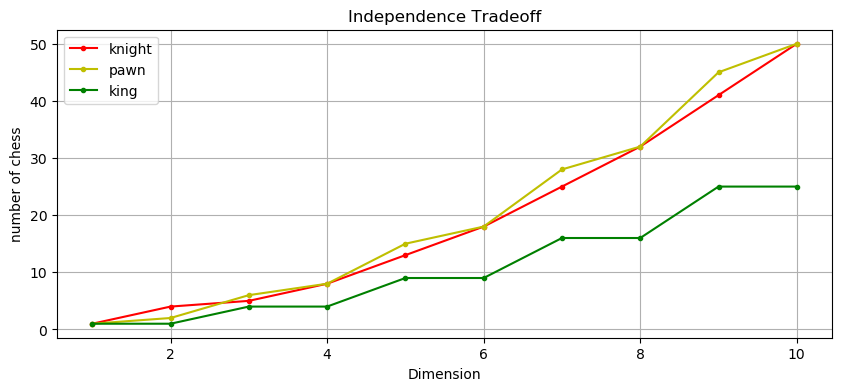

PyObject <matplotlib.legend.Legend object at 0x7f5f2ff89250>

In [48]:
# Independence
dimension = [i for i = 1:10]
n = zeros(10)
p = zeros(10)
k = zeros(10)
for i in dimension
    (X,ON) = knightIndependence(i)
    (Y,OP) = pawnIndependence(i)
    (Z,OK) = kingIndependence(i)
    n[i] = ON
    p[i] = OP
    k[i] = OK
end
;

using PyPlot
fig = figure(figsize=(10,4))
grid()
title("Independence Tradeoff")
xlabel("Dimension")
ylabel("number of chess")
plot(dimension, n, "r.-", dimension, p, "y.-", dimension, k, "g.-")
legend(["knight", "pawn", "king"], loc = "upper left")


#### 4A - Domination 

In [49]:
(X, O) = knightDomination(8)
println("minNumber of knights = ", O)
Y = X*0
printBoard(Y,Y,X,Y,Y,Y,8)

minNumber of knights = 12.0
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   | 
+---+---+---+---+---+---+---+---+
|   |   | N |   |   |   |   |   | 
+---+---+---+---+---+---+---+---+
|   |   | N | N |   | N | N |   | 
+---+---+---+---+---+---+---+---+
|   |   |   |   |   | N |   |   | 
+---+---+---+---+---+---+---+---+
|   |   | N |   |   |   |   |   | 
+---+---+---+---+---+---+---+---+
|   | N | N |   | N | N |   |   | 
+---+---+---+---+---+---+---+---+
|   |   |   |   |   | N |   |   | 
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   | 
+---+---+---+---+---+---+---+---+


In [50]:
(X, O) = pawnDomination(8)
println("minNumber of pawns = ", O)
Y = X*0
printBoard(Y,Y,Y,X,Y,Y,8)

minNumber of pawns = 16.0
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   | 
+---+---+---+---+---+---+---+---+
|   | P | P |   |   | P | P |   | 
+---+---+---+---+---+---+---+---+
|   | P | P |   |   | P | P |   | 
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   | 
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   | 
+---+---+---+---+---+---+---+---+
|   | P | P |   |   | P | P |   | 
+---+---+---+---+---+---+---+---+
|   | P | P |   |   | P | P |   | 
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   | 
+---+---+---+---+---+---+---+---+


In [51]:
(X, O) = kingDomination(8)
println("minNumber of Kings = ", O)
Y = X*0
printBoard(X,Y,Y,Y,Y,Y,8)

minNumber of Kings = 9.0
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   | 
+---+---+---+---+---+---+---+---+
| K |   |   | K |   |   | K |   | 
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   | 
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   | 
+---+---+---+---+---+---+---+---+
|   | K |   |   | K |   |   | K | 
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   | 
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   | K | 
+---+---+---+---+---+---+---+---+
|   | K |   |   | K |   |   |   | 
+---+---+---+---+---+---+---+---+


##### Tradeoff Analysis

While for the domination problem, pawns increases the fastest as the size of chess board increases, while king and and knights are relatively insensitive to the size changes. Pawn's rapid correspondence to change of dimension becomes obvious starting from the point with dimension of 5.    

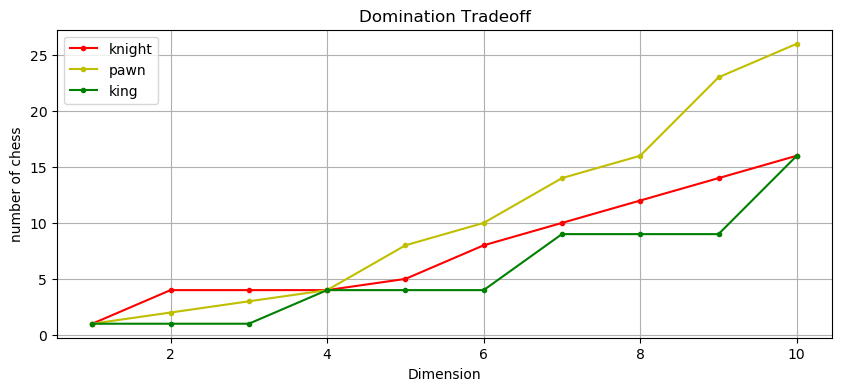

PyObject <matplotlib.legend.Legend object at 0x7f5f2fee8150>

In [52]:
# Domination
dimension = [i for i = 1:10]
n = zeros(10)
p = zeros(10)
k = zeros(10)
for i in dimension
    (X,ON) = knightDomination(i)
    (Y,OP) = pawnDomination(i)
    (Z,OK) = kingDomination(i)
    n[i] = ON
    p[i] = OP
    k[i] = OK
end
;

using PyPlot
fig = figure(figsize=(10,4))
grid()
title("Domination Tradeoff")
xlabel("Dimension")
ylabel("number of chess")
plot(dimension, n, "r.-", dimension, p, "y.-", dimension, k, "g.-")
legend(["knight", "pawn", "king"], loc = "upper left")

<a id='analysis2'></a >
### 4B. Mixed placement results

The mixed placement result shows that the most optimized way of dominating a chessboard is to use 2 kings and 3 queens without any knights with the scores that were assigned to them individually. This is not surprising since the knights are considered have the least threatening power on the board among king and queen. 

Conducting another tradeoff analysis related to the chessboard does not seem to be reasonable here. Since the change of size board can render possible change of switching use of chess types ,therefore, it is quite hard to keep track of the number change of the chess. Thus, we decide not to do a trade off analysis.

In [53]:
(X,Y,Z,O) = mixDomination(1/3, 3/5, 1/4)
println("minNumber of Kings = ", sum(X))
println("Number of queen = ", sum(Y))
println("Number of knights = ", sum(Z))
println("Minimum score is ", O) 
println("A solution is: ")
A = X*0
printBoard(X,Y,Z,A,A,A,8)

minNumber of Kings = 2.0
Number of queen = 3.0
Number of knights = 0.0
Minimum score is 2.466666666666667
A solution is: 
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   | Q | 
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   | 
+---+---+---+---+---+---+---+---+
|   |   |   | K |   |   |   |   | 
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   | 
+---+---+---+---+---+---+---+---+
|   |   |   |   |   | K |   |   | 
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   | 
+---+---+---+---+---+---+---+---+
| Q |   |   |   |   |   |   |   | 
+---+---+---+---+---+---+---+---+
|   | Q |   |   |   |   |   |   | 
+---+---+---+---+---+---+---+---+


<a id='analysis3'></a >
### 4C. Chess Placement: Checkmate and tradeoff analysis

The mixed placement for a whole set of chess suggests that 1 king, 1 queen, 1 knight, 3 pawns, 2 bishops are needed for occupying the whole chessboard. Therefore, we have proven that it is feasible to occupy the whole chessboard within only one kingdom of chess members. 

In [54]:
(K,Q,N,P,B,R,O) = checkmate(8)
println("Number of kings = ", sum(K))                                
println("Number of queens = ", sum(Q))
println("Number of knights = ", sum(N))
println("Number of pawns = ", sum(P))
println("Number of bishops = ", sum(B))
println("Number of rooks = ", sum(R))                 
println("Minimum score is ", O)
println("A solution is: ")
printBoard(K,Q,N,P,B,R,8)

Number of kings = 1.0
Number of queens = 1.0
Number of knights = 1.0
Number of pawns = 3.0
Number of bishops = 2.0
Number of rooks = 0.0
Minimum score is 2.207371794871795
A solution is: 
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   | 
+---+---+---+---+---+---+---+---+
|   |   |   | B |   |   |   |   | 
+---+---+---+---+---+---+---+---+
|   |   | N | P |   |   |   | Q | 
+---+---+---+---+---+---+---+---+
|   |   |   | B |   |   |   |   | 
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   | 
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   | 
+---+---+---+---+---+---+---+---+
|   | P | P |   |   | K |   |   | 
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   | 
+---+---+---+---+---+---+---+---+


##### Tradeoff Analysis

Under this scenanrio, sensitivity analysis associated with score changes do not become reasonable since there are 6 members of chess we need to keep track with. So it would be hard to determine the relationship among them. On the other hand, the approach along with demonsion size turns out be to a viable option here since the total sum score (one kingdom) is fixed. Here we simulated the checkmate situation where we utilized the least number of forces to occupy a certain area. 

From the result, we can observe a linear relationshop between the dimension and the minimum sum scores of the chess group from dimension three. The requiring sumscore remains same for the size 1 and 2 since one queen can easily occupy all the space here. The linear relationshop actually surprised us since increasing the dimension actually does not result a linear increase on the area, but the sum score turned out to increase linearly.

The main takeaway here is the result of the chess group that needed for the chessboard with a dimension of 3. A dimension of 3 chessboard represents the moving range of a king and it can serve as a reference for the minimum forces needed for checkmate (1 queen and 2 bishop). On the other hand, the size 8 chessboard results represents the maximum forces needed for checkmate(printed in part 3). 

In [55]:
# checkmate
dimension = [i for i = 1:8]
o = zeros(8)
for i in dimension
    (K,Q,N,P,B,R,O) = checkmate(i)
    println("Dimension = ", i)          
    printBoard(K,Q,N,P,B,R,i)
    println("")
    o[i] = O
end
;

Dimension = 1
+---+
| P | 
+---+

Dimension = 2
+---+---+
|   |   | 
+---+---+
|   | K | 
+---+---+

Dimension = 3
+---+---+---+
|   |   |   | 
+---+---+---+
|   | K |   | 
+---+---+---+
|   |   |   | 
+---+---+---+

Dimension = 4
+---+---+---+---+
|   |   |   |   | 
+---+---+---+---+
|   | P | P |   | 
+---+---+---+---+
|   | P | P |   | 
+---+---+---+---+
|   |   |   |   | 
+---+---+---+---+

Dimension = 5
+---+---+---+---+---+
|   |   |   |   |   | 
+---+---+---+---+---+
|   |   |   |   |   | 
+---+---+---+---+---+
|   | B | Q | B |   | 
+---+---+---+---+---+
|   |   |   |   |   | 
+---+---+---+---+---+
|   |   |   |   |   | 
+---+---+---+---+---+

Dimension = 6
+---+---+---+---+---+---+
|   |   |   |   |   |   | 
+---+---+---+---+---+---+
|   |   |   |   |   |   | 
+---+---+---+---+---+---+
|   | B | Q | B | P |   | 
+---+---+---+---+---+---+
|   |   |   |   |   |   | 
+---+---+---+---+---+---+
|   |   | P |   |   |   | 
+---+---+---+---+---+---+
|   |   |   |   |   |   | 
+---+---

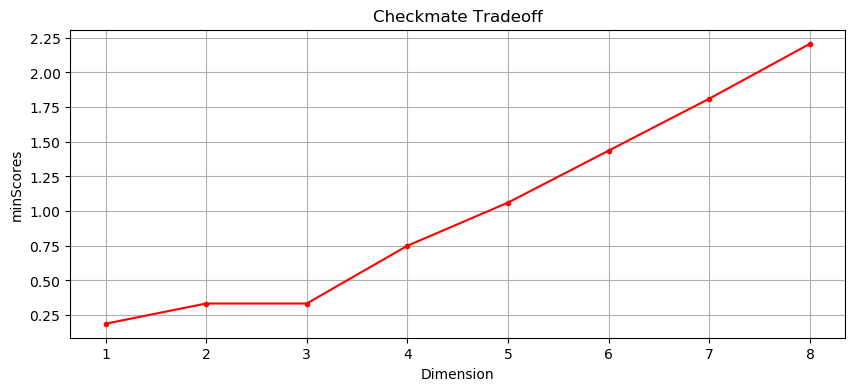

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f5f2fe3d350>

In [56]:
using PyPlot
fig = figure(figsize=(10,4))
grid()
title("Checkmate Tradeoff")
xlabel("Dimension")
ylabel("minScores")
plot(dimension, o, "r.-")

<a id='analysis4'></a >
### 4D. Model Limitation and Further Improvements

One limitation of the modeling is the algorithm of the pawn. The assumption for the pawn is that it can attack its four corners, while in real chess rule, pawns can only reach its forwarding corners. Such deviation of model design can lead to an over estimation of pawn's threatening power, resulting the real total placement scores being underestimated. 

Another limitation of the modeling is that in real chess game, it is not necessary for us to cover the whole chess board for checkmate but a certain area of the board. We were only able to change the length n from the tradeoff analysis. However, it can not cover other shapes of area other than a square. Thus, one further approach that we can conduct is to come up with some other variables that can alter the chess board size more flexibly.  

Moreover, in real chess game, king is usually not involved with direct conflicts with the enemy, not even mention contributing to checkmate. Therefore, one improvement can be done for the checkmate analysis is to exclude the use of king. 

<a id='conclusion'></a >
# 5. Conclusion 

The report presents a further exploration based on the Queen Independence and dominance placement problems. We examined the problem through mixed integer models and solved the placement pattern of other chess members. In addition, we also assigned each chess with different scores that representing its threatening power. The scores are based on the previous results of singular chess replacement. With the scoring, we were able to modeling the optimized placement under the mixed types of chess selections. The solution represents the most effective way of placing chess and can serve as a reference for real strategy. Likewise, the dominance problem can be viewed as the situation for checkmate. One further approach we can do to optimize our checkmate placement is to involve another variable that certifies the regions instead of just altering the board size. In that way, such algorithrim can be used for developing real chess strategy. Moreover, the way of determining assign scores for each chess memeber is not fully justified. Another further approach that we can do is to explore some other algorithm for determining the relative weights among all the chesses.    